#### Life cycle of Machine learning Project

data analisys 

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis

modeling development
- Understanding the Problem Statement
- Data collection
- Data Pre-Processing
- Feature Engineering
- Model Training
- Choose best model

model deploying

- structure de code in modular programing
- deploy the model in aws


### 1.0 problem statement

una empresa X, tiene una base de datos de clientes, en sql , la empresa almacena difentes datos de los usuarios
CustomerID	Gender	Age	Annual Income ($)	Spending Score (1-100)	Profession	Work Experience	Family Size
, y quiero crear un programa , que a partir de los datos sea capas de predecir , el spending score, 
el departamento te a asignado, por que eres el nuevo, y quieres, que realices todo el proceso de la creacion del proyecto
desde la obtencion de los datos, su analisis, hasta la creacion del modelo, y su despliegue, quieren que prepares
todo , para que este disponible como , un microservicio, pero no lo desplegaras solo , lo dejaras preparado, para desplegarlo

### 2.0 Data Collection

###  2.1 librerias a utilizar

In [31]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Data Extraction from database

In [146]:
#se supone que esta parte me la da la empresa pero tambien podria pasar que dan desde una api

driver = "ODBC+Driver+17+for+SQL+Server"
server_name = "localhost"
database = "BDdatasets"
UID = "sa"
PWD = "0440"

connection_string = f"mssql+pyodbc://{UID}:{PWD}@{server_name}/{database}?driver={driver}"
engine = create_engine(connection_string)

query = "SELECT * FROM Customers"

df = pd.read_sql_query(query , engine)

### 2.3 show top 5 records

In [147]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000.0,39.0,Healthcare,1,4
1,2,Male,21,35000.0,81.0,Engineer,3,3
2,3,Female,20,86000.0,6.0,Engineer,1,1
3,4,Female,23,59000.0,77.0,Lawyer,0,2
4,5,Female,31,38000.0,40.0,Entertainment,2,6


### 2.4 shape of the dataset

In [148]:
df.shape

(2000, 8)

### 2.5 Dataset information

- Customerid : the id of client
- gender: the client gender
- age: the client age
- AnnualIncome: the client salary
- SpendingScore: the score of the client, this is the label
- profesion: the jobs of the client
- WorkExperience: the years of experience of the cliente
- FamilySize: is the number of member of the family of the client

### 3.0 Data Check perform
- Check missing values
- check duplicate 
- check data type
- check the number of unique value of eache columnc
- check statistic of data set
- check various categories present in the different categorical column

### 3.1 Check Missing Values

In [149]:
df.isna().sum()

CustomerID         0
Gender             0
Age                0
AnnualIncome       0
SpendingScore      0
Profession        35
WorkExperience     0
FamilySize         0
dtype: int64

#### insighs: the columns Profession has null values

### 3.1.2 drop null

In [150]:
df = df.dropna()

### 3.2 check duplicates

In [107]:
df.duplicated().sum()

0

#### insighs: there are no duplicate values

### 3.3 check data types


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1965 non-null   object 
 1   Gender          1965 non-null   object 
 2   Age             1965 non-null   int64  
 3   AnnualIncome    1965 non-null   float64
 4   SpendingScore   1965 non-null   float64
 5   Profession      1965 non-null   object 
 6   WorkExperience  1965 non-null   int64  
 7   FamilySize      1965 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 138.2+ KB


#### 3.4 Checking the number of unique values of each columns

In [110]:
df.nunique()

CustomerID        1965
Gender               2
Age                100
AnnualIncome      1755
SpendingScore      101
Profession           9
WorkExperience      18
FamilySize           9
dtype: int64

### 3.5 check statistics of dataset

In [43]:
df.describe()

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


### insights
- from above descripcion of the numerical data, the AnnualIncome has the most standard deviation
- the columns have diferets scales

### 3.6 Exploring Data

In [44]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000.0,39.0,Healthcare,1,4
1,2,Male,21,35000.0,81.0,Engineer,3,3
2,3,Female,20,86000.0,6.0,Engineer,1,1
3,4,Female,23,59000.0,77.0,Lawyer,0,2
4,5,Female,31,38000.0,40.0,Entertainment,2,6


In [49]:
print(f"Categories in Gender columns")
print(f"{df['Gender'].unique()}")

print(f"Categories in Profession columns")
print(f"{df['Profession'].unique()}")


Categories in Gender columns
['Male' 'Female']
Categories in Profession columns
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' None]


In [59]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O']

print(f"we have {len(numeric_features)} numerical features : {numeric_features}")
print(f"we have {len(categorical_features)} categorical featues : {categorical_features}")


we have 5 numerical features : ['Age', 'AnnualIncome', 'SpendingScore', 'WorkExperience', 'FamilySize']
we have 3 categorical featues : ['CustomerID', 'Gender', 'Profession']


In [60]:
df.head(2)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000.0,39.0,Healthcare,1,4
1,2,Male,21,35000.0,81.0,Engineer,3,3


### 4.0 Exploring the data (visualization)

### visualize the data distribution for make some conclusions
- pie char
- histogram
- boxplot

### 4.1 pie char

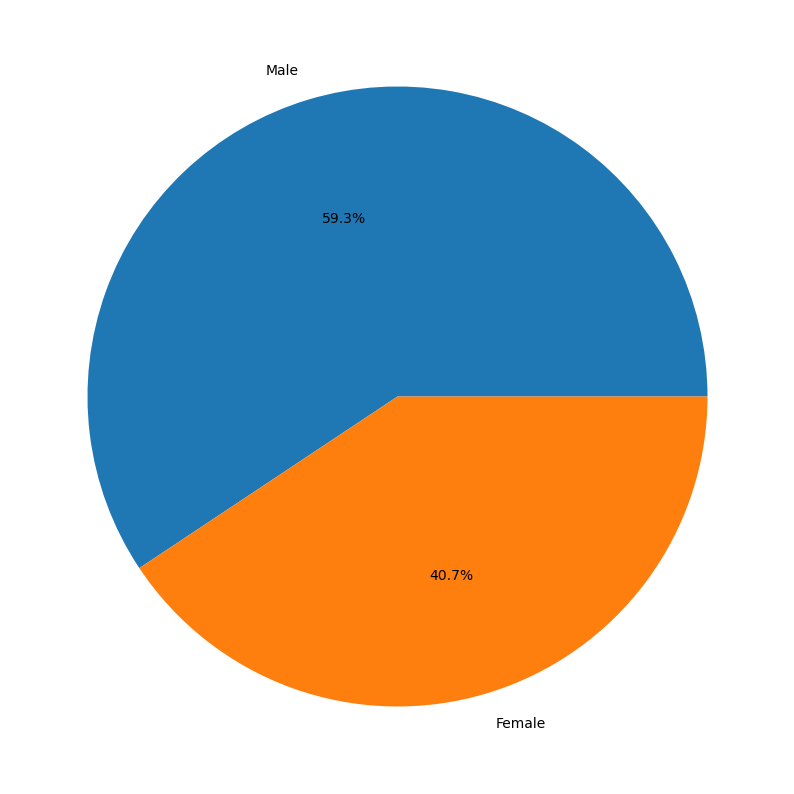

In [111]:
data = df["Gender"].value_counts()
labels = df["Gender"].unique()

plt.figure(figsize = (10,20) )
plt.pie( data , labels = labels , autopct = "%1.1f%%"  )
plt.show()

there are more males than females

In [113]:
df["Profession"].value_counts() , df["Profession"].unique()

(Profession
 Artist           612
 Healthcare       339
 Entertainment    234
 Engineer         179
 Doctor           161
 Executive        153
 Lawyer           142
 Marketing         85
 Homemaker         60
 Name: count, dtype: int64,
 array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
        'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object))

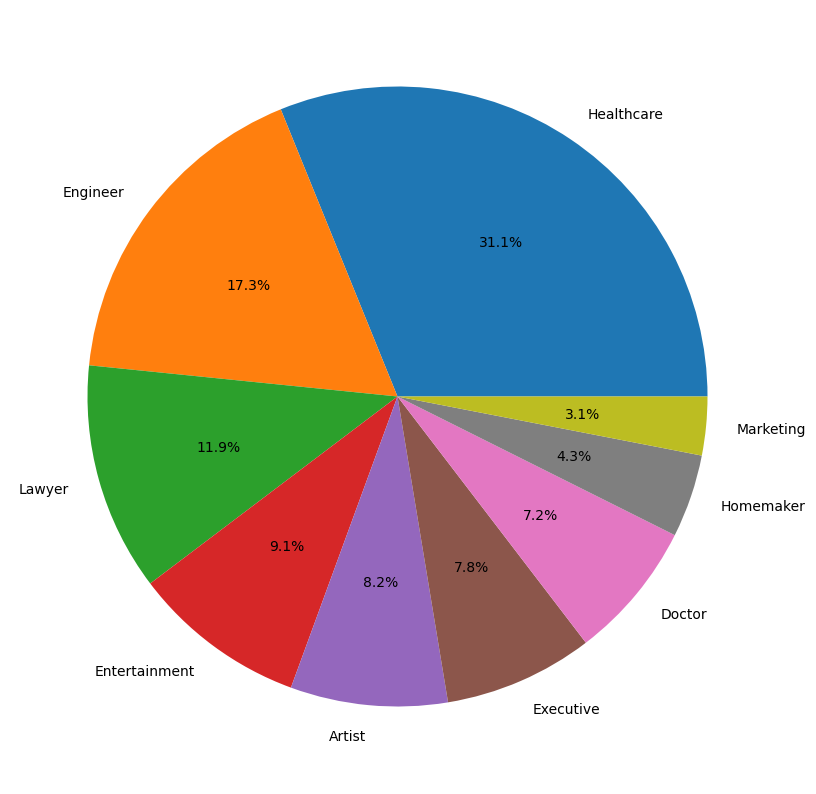

In [115]:
data = df["Profession"].value_counts()
labels = df["Profession"].unique()

plt.figure(figsize = (10,20) )
plt.pie( data , labels = labels , autopct = "%1.1f%%"  )
plt.show()

### insighs
- the third part of the jobs of the dataset are health care
- and  17% are engineer , that explain why the salary are high in the describe of the dataset

### 4.2 Histogram

<Axes: xlabel='AnnualIncome', ylabel='Count'>

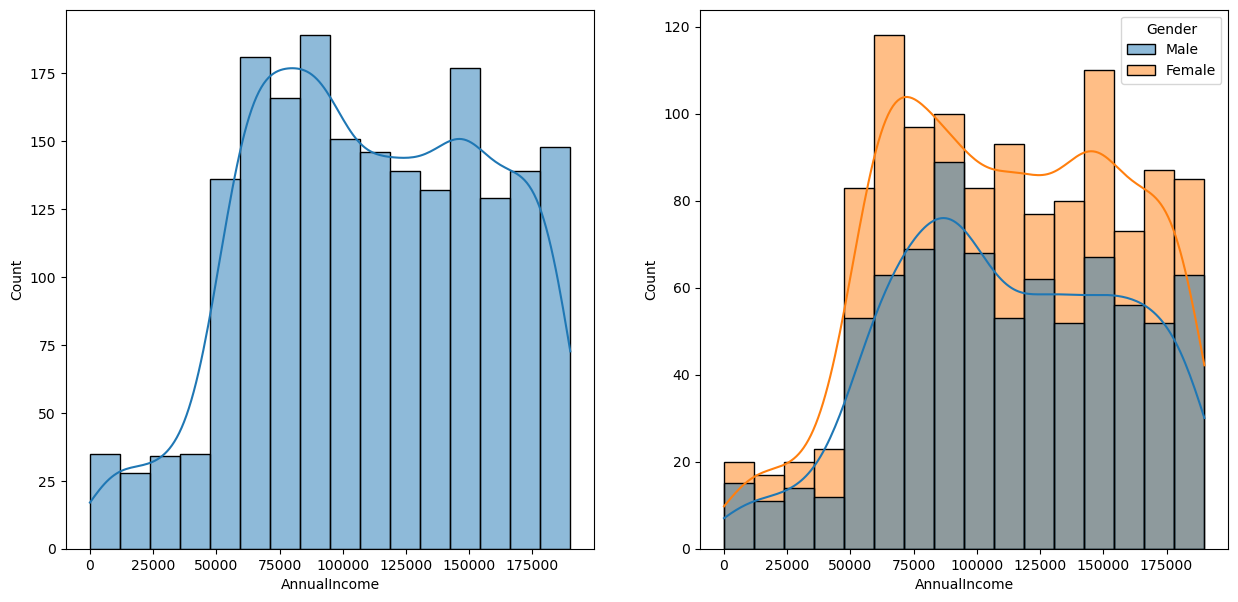

In [119]:
plt.subplots(1,2,figsize = (  15 ,7  ) ) 
plt.subplot(121)
sns.histplot(data = df , x = "AnnualIncome" , kde = True  )
plt.subplot(122)
sns.histplot(data = df , x = "AnnualIncome" , kde = True , hue = "Gender")

### insights
- the is no diferent salaries of man and females

<Axes: xlabel='AnnualIncome', ylabel='Count'>

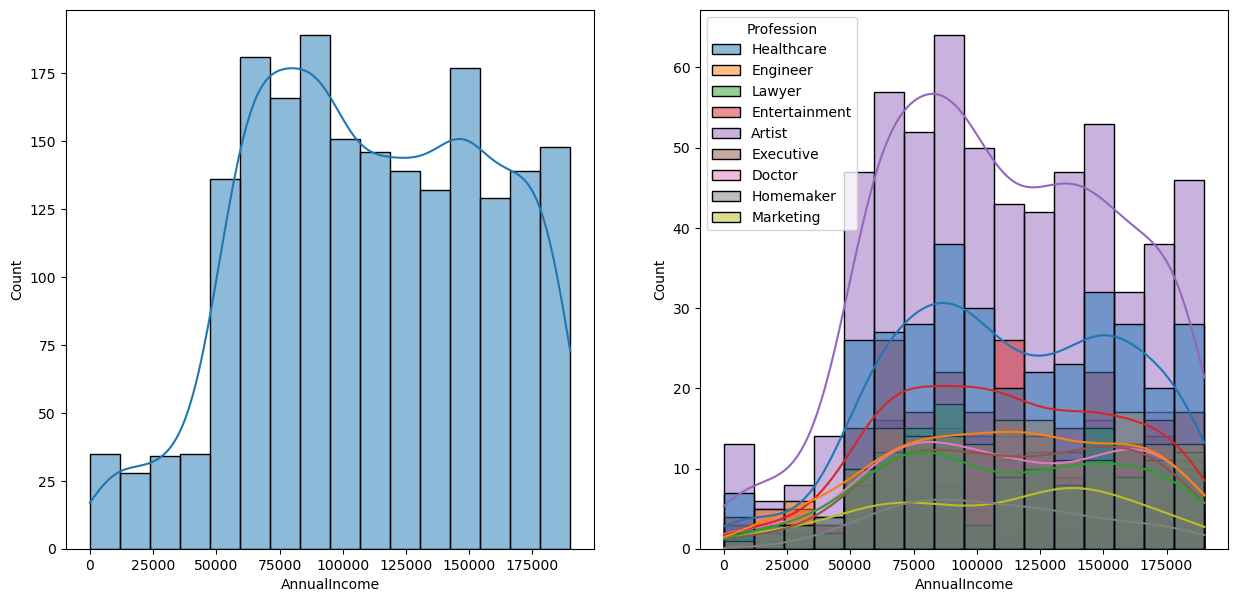

In [121]:
plt.subplots(1,2, figsize = (15 , 7))
plt.subplot(121)
sns.histplot(data = df , x="AnnualIncome" , kde = True )
plt.subplot(122)
sns.histplot(data = df , x ="AnnualIncome" , kde = True , hue = "Profession" )

### insights
- the doctors earn more money

### boxplots

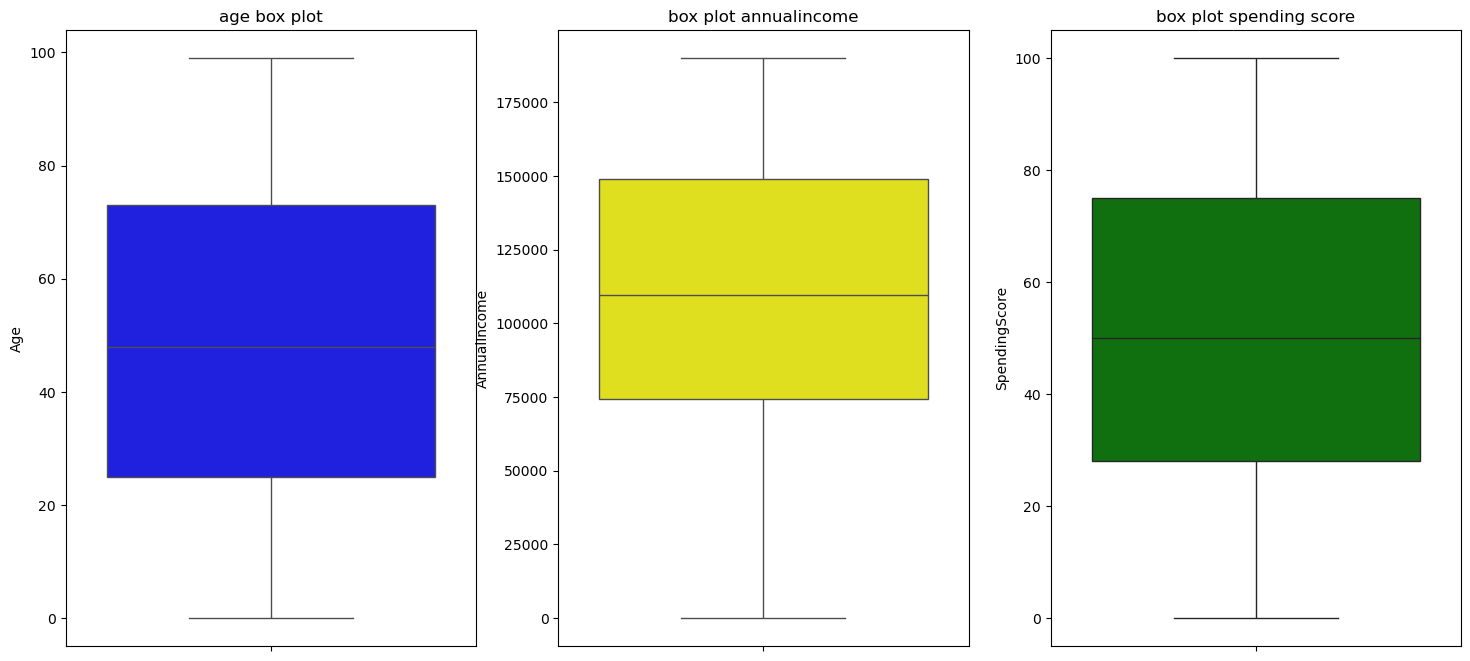

In [136]:
fig , axes = plt.subplots(1,3,figsize = (18 , 8))

plt.subplot(131)

sns.boxplot(y = "Age" , data = df , color = "blue"  , ax = axes[0])
axes[0].set_title("age box plot")

plt.subplot(132)
sns.boxplot(y = "AnnualIncome" , data = df  , color = "yellow"  , ax = axes[1])
axes[1].set_title("box plot annualincome")


plt.subplot(133)
sns.boxplot(y = "SpendingScore" , data = df  , color = "green"  , ax = axes[2])
axes[2].set_title("box plot spending score")
plt.show()

### insights 
- of the above box plots , there is not outliers

In [129]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000.0,39.0,Healthcare,1,4
1,2,Male,21,35000.0,81.0,Engineer,3,3
2,3,Female,20,86000.0,6.0,Engineer,1,1
3,4,Female,23,59000.0,77.0,Lawyer,0,2
4,5,Female,31,38000.0,40.0,Entertainment,2,6


In [154]:
df_group_gender = df.groupby("Gender")[numeric_features].mean()
df_group_gender

,Age,AnnualIncome,SpendingScore,WorkExperience,FamilySize
Gender,,,,,
Female,48.906518,110434.875643,50.993139,4.036021,3.76072
Male,48.877347,110880.342929,51.204005,4.175219,3.75219


In [175]:
index = ["Female" , "Male"]
values = [ df_group_gender.loc["Female"]["AnnualIncome"],df_group_gender.loc["Male"]["AnnualIncome"] ]

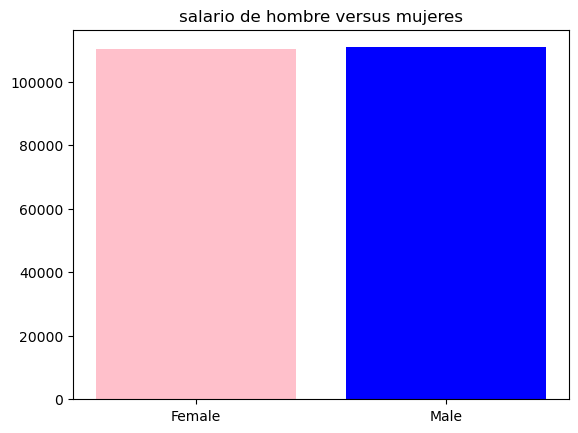

In [177]:
plt.bar(index ,values, color = ["Pink" , "Blue"])
plt.title("salario de hombre versus mujeres")
plt.show()

### insights
- ganan practicamente igual

# fin del eda